In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv(r"C:\Users\bhanu\Downloads\AirQualityUCI.csv")

In [3]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10-03-2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df['CO(HIGH)']=(df['CO(GT)']>2.5).astype(int)



In [5]:
# Drop rows where any of the specified columns have NaN
df = df.dropna(subset=['PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 
                       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH'])

# Define features (x) and target (y)
x = df[['PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 
        'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']]
y = df['CO(HIGH)']

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [7]:
model=LogisticRegression()
model.fit(x_train,y_train)

c:\Users\bhanu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
y_pred=model.predict(x_test)

In [9]:
acc=accuracy_score(y_test,y_pred)

In [10]:
print(acc)

0.9262820512820513


In [11]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1399
           1       0.88      0.82      0.85       473

    accuracy                           0.93      1872
   macro avg       0.91      0.89      0.90      1872
weighted avg       0.93      0.93      0.93      1872



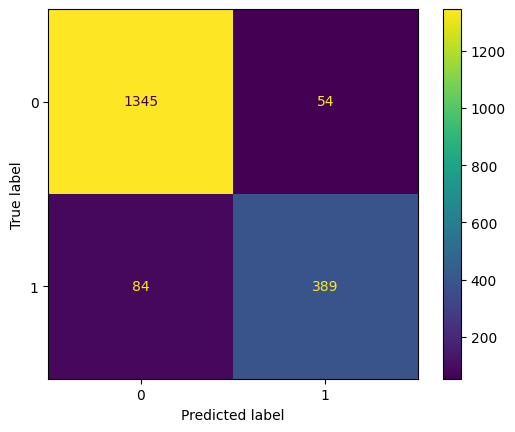

In [12]:
cm=confusion_matrix(y_test,y_pred)
display=ConfusionMatrixDisplay(cm)
display.plot()

In [37]:
from sklearn.metrics import RocCurveDisplay,roc_curve,auc,roc_auc_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

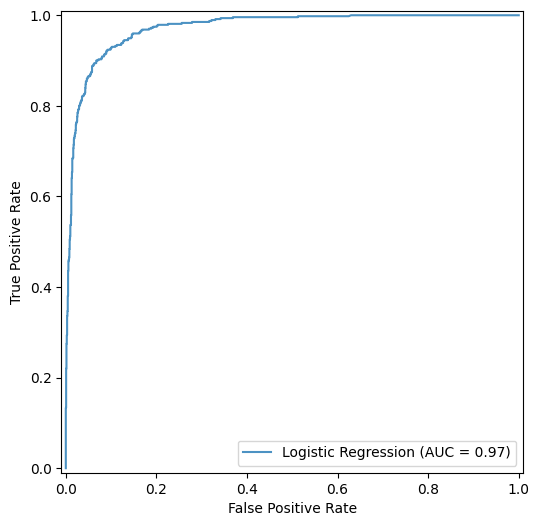

In [17]:
y_score=model.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
display.plot(ax=plt.gca(), alpha=0.8)
plt.show()

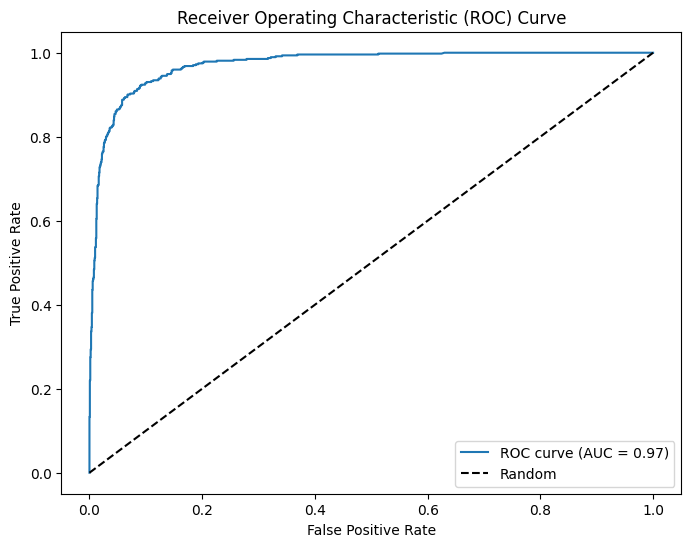

In [ ]:
y_probs = model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

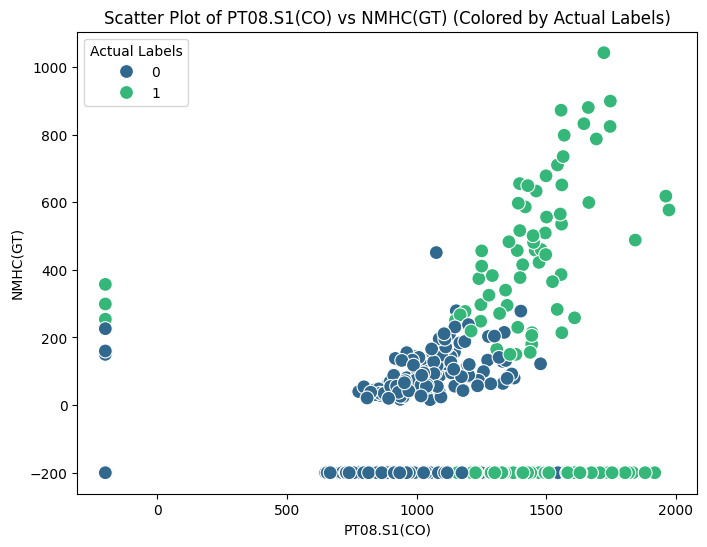

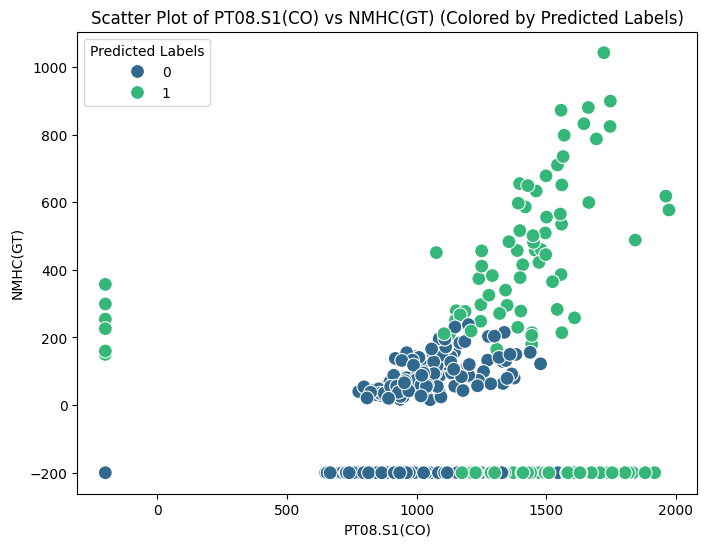

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


feature1 = x.columns[0]
feature2 = x.columns[1]


plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_test[feature1], y=x_test[feature2], hue=y_test, palette='viridis', s=100)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f'Scatter Plot of {feature1} vs {feature2} (Colored by Actual Labels)')
plt.legend(title='Actual Labels')
plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_test[feature1], y=x_test[feature2], hue=y_pred, palette='viridis', s=100)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f'Scatter Plot of {feature1} vs {feature2} (Colored by Predicted Labels)')
plt.legend(title='Predicted Labels')
plt.show()

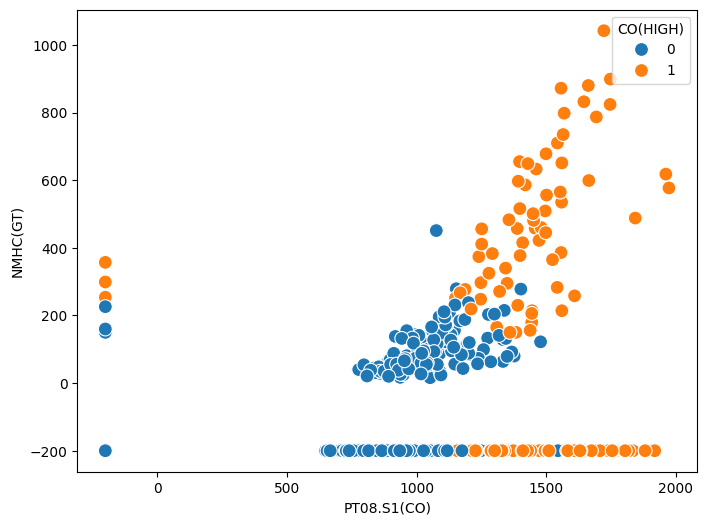

In [32]:
feat1=x.columns[0]
feat2=x.columns[1]

plt.figure(figsize=(8,6))
sns.scatterplot(x=x_test[feat1],y=x_test[feat2],hue=y_test,s=100)
plt.show()

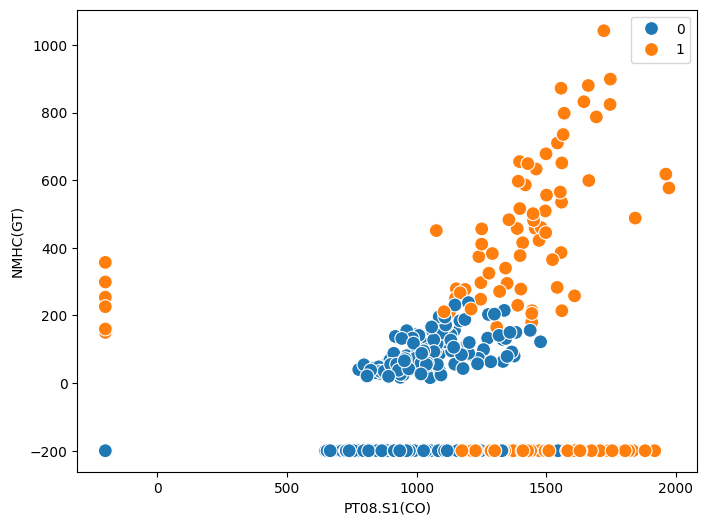

In [33]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=x_test[feat1],y=x_test[feat2],hue=y_pred,s=100)
plt.show()

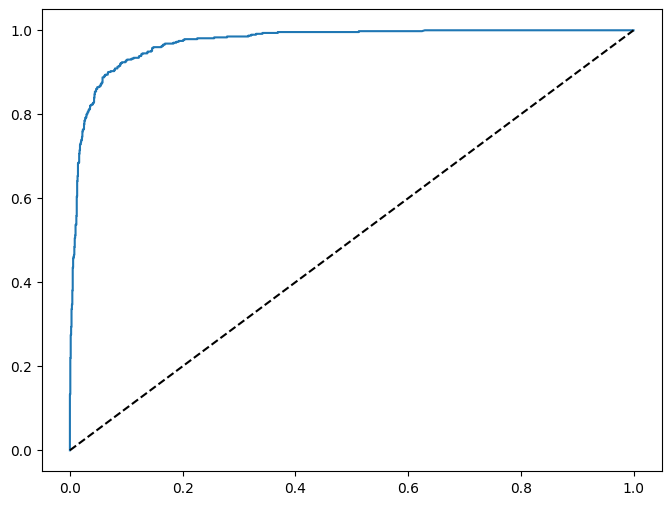

In [36]:
y_score=model.predict_proba(x_test)[:,1]

fpr,tpr,thresholds=roc_curve(y_test,y_score)
roc_auc=roc_auc_score(y_test,y_score)

plt.figure(figsize=(8,6))
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.show()

In [41]:
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(cm)


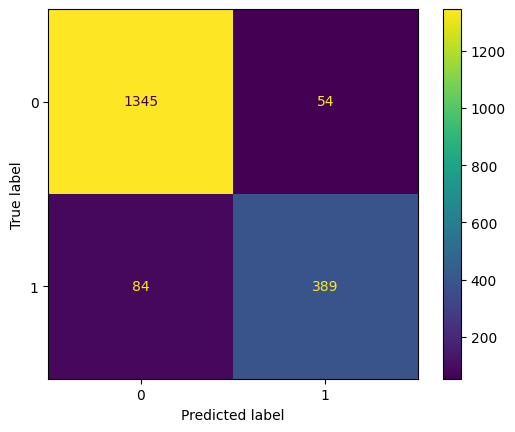

In [42]:
disp.plot()

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1399
           1       0.88      0.82      0.85       473

    accuracy                           0.93      1872
   macro avg       0.91      0.89      0.90      1872
weighted avg       0.93      0.93      0.93      1872

